# Tugas 3.1 : Implementasi Algoritma Logistic Regression

Pada Tugas 3.1 ini diminta untuk melakukan proses pembuatan model dari data VSM yang telah dibuat sebelumnya menggunakan algoritma Logistic Regression.

Dibuat Oleh:

*   Nama : Sabil Ahmad Hidayat
*   NIM : 220411100058
*   Kelas : PPW A

Link Code : https://colab.research.google.com/drive/1z3vSdGjASLTsxGVhzBoOSJBG2kiG8aT4?usp=sharing

Link Github : https://github.com/meinhere/ppw/tree/master/publish/tugas-3

## Import Library

In [1]:
# library awal untuk perhitungan dan pengolahan teks
import numpy as np
import pandas as pd

# library untuk proses modeling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# library untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# load and save model
import pickle
import requests

KeyboardInterrupt: 

**preprocessing** disini digunakan untuk melakukan proses encoding pada label

**train_test_split** digunakan untuk membagi dataset menjadi data training dan testing

**LogisticRegression** digunakan untuk tahap modeling menggunakan library LogisticRegression

**classification_report** dan **confusion_matrix** digunakan untuk melihat laporan dan hasil evaluasi setelah proses training data

**matplotlib** dan **seaborn** digunakan untuk plotting grafik

**pickle** digunakan untuk menyimpan model hasil training dan testing

## Proses Modeling

### Load Data

#### Train

In [38]:
# train_df
train_tfidf_df = pd.read_csv('https://raw.githubusercontent.com/meinhere/ppw/master/publish/tugas-2/dataset/train_df_tfidf.csv', delimiter=',')

train_tfidf_df.head()

,aaion,aali,abadi,abai,abenkh,abnormal,absurd,ac,acara,access,...,yzr,za,zad,zaman,zarco,zenix,zero,zigzag,zona,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058149,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MONEY
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MONEY
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OTOMOTIF
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OTOMOTIF
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OTOMOTIF


#### Test

In [39]:
# train_df
test_df = pd.read_csv('https://raw.githubusercontent.com/meinhere/ppw/master/publish/tugas-2/dataset/test_df.csv', delimiter=',')

test_df.head()

,desc_clean_stem,label
0,kompas com unit kelola giat dana amanah daya m...,MONEY
1,jakarta kompas com balap gresini racing alex m...,OTOMOTIF
2,jakarta kompas com jaksa agung jagung ri salah...,MONEY
3,jakarta kompas com pt toyota astra motor tam l...,OTOMOTIF
4,jakarta kompas com temu indonesia africa forum...,MONEY


### Preparing Data

#### Load Vectorizer

In [40]:
github_raw_url = "https://raw.githubusercontent.com/meinhere/ppw/master/publish/tugas-3/model/tfidf_vectorizer.sav"

response = requests.get(github_raw_url)
response.raise_for_status()

vectorizer = pickle.loads(response.content)
vectorizer

TfidfVectorizer()

#### TF-IDF Data Test

In [41]:
test = test_df['desc_clean_stem']
test_tfidf = vectorizer.transform(test)
vocabulary = vectorizer.get_feature_names_out().tolist()

# Convert to DataFrame for easier handling
test_tfidf_df = pd.DataFrame(test_tfidf.toarray(), columns=vocabulary)
test_tfidf_df['label'] = test_df['label'].tolist()

test_tfidf_df

,aaion,aali,abadi,abai,abenkh,abnormal,absurd,ac,acara,access,...,yzr,za,zad,zaman,zarco,zenix,zero,zigzag,zona,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF


#### Encode Label
Dilakukan tahap encoding pada kolom **[Kategori Berita]** dimana data yang yang terdapat didalamnya masih berupa data kategorik (kata) sehingga perlu dirubah menjadi angka agar bisa dimasukkan ke dalam proses training model. Berikut adalah hasil dari proses encode.


*   OTOMOTIF = 1
*   MONEY = 0



In [42]:
# menggunakan label_encoder untuk merubah kata menjadi angka
label_encoder = preprocessing.LabelEncoder()
train_tfidf_df['label']= label_encoder.fit_transform(train_tfidf_df['label'])

train_tfidf_df

,aaion,aali,abadi,abai,abenkh,abnormal,absurd,ac,acara,access,...,yzr,za,zad,zaman,zarco,zenix,zero,zigzag,zona,label
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058149,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
76,0.053854,0.0,0.0,0.0,0.0,0.0,0.0,0.037974,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
77,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
78,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.121219,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1


In [43]:
test_tfidf_df['label']= label_encoder.fit_transform(test_tfidf_df['label'])

test_tfidf_df

,aaion,aali,abadi,abai,abenkh,abnormal,absurd,ac,acara,access,...,yzr,za,zad,zaman,zarco,zenix,zero,zigzag,zona,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1


#### Splitting Data

Setelah data berbentuk numerik, maka dilakukan proses splitting/pemecahan data menjadi **Data Training** dana **Data Testing** untuk masuk ke tahap proses modeling.

### Logistic Regression Model

#### Training

In [44]:
# Separate features (X) and target (y) for training data
X_train = train_tfidf_df.drop('label', axis=1)
y_train = train_tfidf_df['label']

# Separate features (X) and target (y) for testing data
X_test = test_tfidf_df.drop('label', axis=1)
y_test = test_tfidf_df['label']

In [45]:
# fit model untuk training
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

#### Testing

In [46]:
# mencoba prediksi dari hasi fitting model
y_pred = lr_model.predict(X_test)

y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [47]:
# melihat nilai actual dan predicted
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


Dilakukan proses testing data. Pada tabel diatas dapat dilihat bahwa hasil yang terprediksi (predicted) apakah sesuai dengan data asli (actual).

### Evaluation Model

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



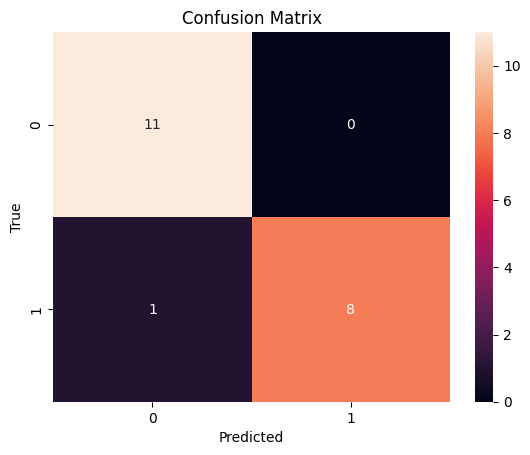

In [48]:
# Confusion matrix dan classification report
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

Dilakukan proses evaluasi model menggunakan **confusion_matrix**. Dengan begitu, dapat dilihat bahwa dari 20 data uji terdapat 1 data uji yang salah prediksi sehingga akurasi yang didapat dari model tersebut adalah **0.95 / 95%**

## Saving Model

In [49]:
# Save the pipeline to a file
filename = 'lr_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))